In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('D:\CS\Big Mart Sales')

In [2]:
train = pd.read_csv('Train_Sales.txt')

sample = pd.read_csv('SampleSubmission_Sales.txt')

In [3]:
test =  pd.read_csv('Test_Sales.txt')

In [4]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [7]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [8]:
train['Years'] = 2019- train['Outlet_Establishment_Year']

In [9]:
train.drop(columns = ['Outlet_Establishment_Year'] , inplace = True)

In [10]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,20
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,10
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,20
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,21
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,32


In [11]:
train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [12]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years
Item_Weight,1.000000,-0.014048,0.027141,0.014123,0.011588
Item_Visibility,-0.014048,1.000000,-0.001315,-0.128625,0.074834
Item_MRP,0.027141,-0.001315,1.000000,0.567574,-0.005020
Item_Outlet_Sales,0.014123,-0.128625,0.567574,1.000000,0.049135
Years,0.011588,0.074834,-0.005020,0.049135,1.000000


In [13]:
train['Item_Visibility'] = np.where(train['Item_Visibility'] == 0 , 0.053931 , train['Item_Visibility'])

In [14]:
train.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,20
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,10
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,20
3,FDX07,19.200,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,21
4,NCD19,8.930,Low Fat,0.053931,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,32
5,FDP36,10.395,Regular,0.053931,Baking Goods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088,10
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,High,Tier 3,Supermarket Type1,343.5528,32
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,Medium,Tier 3,Supermarket Type3,4022.7636,34
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,NaN,Tier 2,Supermarket Type1,1076.5986,17
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,NaN,Tier 2,Supermarket Type1,4710.5350,12


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier         8523 non-null object
Item_Weight             7060 non-null float64
Item_Fat_Content        8523 non-null object
Item_Visibility         8523 non-null float64
Item_Type               8523 non-null object
Item_MRP                8523 non-null float64
Outlet_Identifier       8523 non-null object
Outlet_Size             6113 non-null object
Outlet_Location_Type    8523 non-null object
Outlet_Type             8523 non-null object
Item_Outlet_Sales       8523 non-null float64
Years                   8523 non-null int64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [16]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years
Item_Weight,1.000000,-0.019350,0.027141,0.014123,0.011588
Item_Visibility,-0.019350,1.000000,-0.004531,-0.134095,0.078271
Item_MRP,0.027141,-0.004531,1.000000,0.567574,-0.005020
Item_Outlet_Sales,0.014123,-0.134095,0.567574,1.000000,0.049135
Years,0.011588,0.078271,-0.005020,0.049135,1.000000


In [17]:
train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [18]:
train['Item_Weight'].fillna(12.600000 , inplace = True)

In [19]:
pd.crosstab(train['Outlet_Identifier'] , train['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Identifier,,,
OUT010,0,0,555
OUT013,0,0,932
OUT017,0,926,0
OUT018,0,0,928
OUT019,528,0,0
OUT027,0,0,935
OUT035,0,930,0
OUT045,0,929,0
OUT046,930,0,0


In [20]:
train.drop(columns = ['Outlet_Identifier'] , inplace = True)

In [21]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,20
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,10
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,20
3,FDX07,19.200,Regular,0.053931,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800,21
4,NCD19,8.930,Low Fat,0.053931,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,32
5,FDP36,10.395,Regular,0.053931,Baking Goods,51.4008,Medium,Tier 3,Supermarket Type2,556.6088,10
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,High,Tier 3,Supermarket Type1,343.5528,32
7,FDP10,12.600,Low Fat,0.127470,Snack Foods,107.7622,Medium,Tier 3,Supermarket Type3,4022.7636,34
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,NaN,Tier 2,Supermarket Type1,1076.5986,17
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,NaN,Tier 2,Supermarket Type1,4710.5350,12


In [22]:
pd.crosstab(train['Outlet_Location_Type'] , train['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,528,1860,0,0
Tier 2,0,2785,0,0
Tier 3,555,932,928,935


In [23]:
pd.crosstab(train['Outlet_Location_Type'] , train['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,930,1458
Tier 2,0,0,930
Tier 3,932,1863,0


Tier 2 : Small
Tier 3 : Medium
Tier 1:  Small

In [24]:
def set_value(row_number , assigned_number):
    return assigned_number[row_number]


In [25]:
for i in np.arange(0,8523):
    if(train['Outlet_Size'][i] != train['Outlet_Size'][i]):
        if(train['Outlet_Location_Type'][i] == 'Tier 1'):
            train['Outlet_Size'][i] = 'Small'
        elif(train['Outlet_Location_Type'][i] == 'Tier 2'):
            train['Outlet_Size'][i] = 'Small'
        elif(train['Outlet_Location_Type'][i] == 'Tier 3'):
            train['Outlet_Size'][i] = 'Medium'

D:\Anaconda Python\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda Python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [27]:
for i in np.arange(0,5681):
    if(test['Outlet_Size'][i] != test['Outlet_Size'][i]):
        if(test['Outlet_Location_Type'][i] == 'Tier 1'):
            test['Outlet_Size'][i] = 'Small'
        elif(test['Outlet_Location_Type'][i] == 'Tier 2'):
            test['Outlet_Size'][i] = 'Small'
        elif(test['Outlet_Location_Type'][i] == 'Tier 3'):
            test['Outlet_Size'][i] = 'Medium'

D:\Anaconda Python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda Python\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,20
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,10
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,20
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,21
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,32


In [29]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Identifier         8523 non-null object
Item_Weight             8523 non-null float64
Item_Fat_Content        8523 non-null object
Item_Visibility         8523 non-null float64
Item_Type               8523 non-null object
Item_MRP                8523 non-null float64
Outlet_Size             8523 non-null object
Outlet_Location_Type    8523 non-null object
Outlet_Type             8523 non-null object
Item_Outlet_Sales       8523 non-null float64
Years                   8523 non-null int64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.5+ KB


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [32]:
test['Item_Visibility'].describe()

count    5681.000000
mean        0.065684
std         0.051252
min         0.000000
25%         0.027047
50%         0.054154
75%         0.093463
max         0.323637
Name: Item_Visibility, dtype: float64

In [33]:
test['Item_Visibility'] = np.where(test['Item_Visibility'] == 0 , 0.054154 , test['Item_Visibility'])

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [35]:
test['Item_Weight'].describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [37]:
test['Years'] = 2019- test['Outlet_Establishment_Year']

In [38]:
test.drop(columns = ['Outlet_Establishment_Year'] , inplace = True)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Identifier         8523 non-null object
Item_Weight             8523 non-null float64
Item_Fat_Content        8523 non-null object
Item_Visibility         8523 non-null float64
Item_Type               8523 non-null object
Item_MRP                8523 non-null float64
Outlet_Size             8523 non-null object
Outlet_Location_Type    8523 non-null object
Outlet_Type             8523 non-null object
Item_Outlet_Sales       8523 non-null float64
Years                   8523 non-null int64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.5+ KB


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier         5681 non-null object
Item_Weight             4705 non-null float64
Item_Fat_Content        5681 non-null object
Item_Visibility         5681 non-null float64
Item_Type               5681 non-null object
Item_MRP                5681 non-null float64
Outlet_Identifier       5681 non-null object
Outlet_Size             5681 non-null object
Outlet_Location_Type    5681 non-null object
Outlet_Type             5681 non-null object
Years                   5681 non-null int64
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [41]:
test['Item_Weight'].describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [42]:
test['Item_Weight'].fillna(12.500000 , inplace = True)

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier         5681 non-null object
Item_Weight             5681 non-null float64
Item_Fat_Content        5681 non-null object
Item_Visibility         5681 non-null float64
Item_Type               5681 non-null object
Item_MRP                5681 non-null float64
Outlet_Identifier       5681 non-null object
Outlet_Size             5681 non-null object
Outlet_Location_Type    5681 non-null object
Outlet_Type             5681 non-null object
Years                   5681 non-null int64
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier         5681 non-null object
Item_Weight             5681 non-null float64
Item_Fat_Content        5681 non-null object
Item_Visibility         5681 non-null float64
Item_Type               5681 non-null object
Item_MRP                5681 non-null float64
Outlet_Identifier       5681 non-null object
Outlet_Size             5681 non-null object
Outlet_Location_Type    5681 non-null object
Outlet_Type             5681 non-null object
Years                   5681 non-null int64
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Identifier         8523 non-null object
Item_Weight             8523 non-null float64
Item_Fat_Content        8523 non-null object
Item_Visibility         8523 non-null float64
Item_Type               8523 non-null object
Item_MRP                8523 non-null float64
Outlet_Size             8523 non-null object
Outlet_Location_Type    8523 non-null object
Outlet_Type             8523 non-null object
Item_Outlet_Sales       8523 non-null float64
Years                   8523 non-null int64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.5+ KB


In [46]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,20
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,10
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,20
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,21
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,32


In [47]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [48]:
event = {'Low Fat' : 'Low Fat' , 'Regular' : 'Regular' , 'LF' : 'Low Fat', 'reg' : 'Regular' , 'low fat' : 'Low Fat'}

In [49]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].apply(set_value , args = (event , ))

In [50]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].apply(set_value , args = (event , ))

In [51]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [52]:
event = {'Fruits and Vegetables' : 'Food' , 'Snack Foods' : 'Food' , 'Household' : 'Others' , 'Frozen Foods' : 'Food' , 'Dairy':'Food',
        'Canned' : 'Food' ,'Baking Goods' : 'Food' , 'Health and Hygiene': 'Others' , 'Soft Drinks' : 'Drinks' , 'Meat':'Food' , 'Breads':'Food',
        'Hard Drinks':'Drinks' , 'Others':'Others', 'Starchy Foods' : 'Food' , 'Breakfast' : 'Food' , 'Seafood' : 'Food'}

In [53]:
train['Food_Type'] = train['Item_Type'].apply(set_value , args = (event , ))

In [54]:
test['Food_Type'] = test['Item_Type'].apply(set_value , args = (event , ))

In [55]:
test.drop(columns = ['Outlet_Identifier'] , inplace = True)

In [56]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years,Food_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1,20,Food
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,Small,Tier 2,Supermarket Type1,12,Food
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,Medium,Tier 3,Grocery Store,21,Others
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,Small,Tier 2,Supermarket Type1,12,Food
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3,34,Food


# EDA

In [57]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years,Food_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,20,Food
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,10,Drinks
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,20,Food
3,FDX07,19.200,Regular,0.053931,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,21,Food
4,NCD19,8.930,Low Fat,0.053931,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,32,Others
5,FDP36,10.395,Regular,0.053931,Baking Goods,51.4008,Medium,Tier 3,Supermarket Type2,556.6088,10,Food
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,High,Tier 3,Supermarket Type1,343.5528,32,Food
7,FDP10,12.600,Low Fat,0.127470,Snack Foods,107.7622,Medium,Tier 3,Supermarket Type3,4022.7636,34,Food
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,Small,Tier 2,Supermarket Type1,1076.5986,17,Food
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,Small,Tier 2,Supermarket Type1,4710.5350,12,Food


In [58]:
test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years,Food_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1,20,Food
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,Small,Tier 2,Supermarket Type1,12,Food
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,Medium,Tier 3,Grocery Store,21,Others
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,Small,Tier 2,Supermarket Type1,12,Food
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3,34,Food
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,Small,Tier 1,Supermarket Type1,22,Food
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,Medium,Tier 3,Supermarket Type2,10,Food
7,FDC48,12.500,Low Fat,0.015782,Baking Goods,81.0592,Medium,Tier 3,Supermarket Type3,34,Food
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,Small,Tier 2,Supermarket Type1,17,Food
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,Small,Tier 2,Supermarket Type1,12,Food


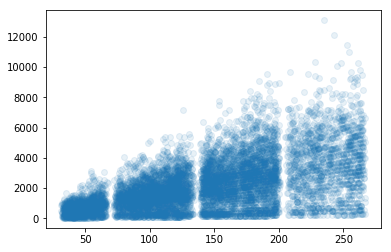

In [59]:
plt.scatter(x = train['Item_MRP'] , y = train['Item_Outlet_Sales'] , s = 35 , alpha = 0.1)

# Supermarket Type

In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [61]:
mc = MultiComparison(train['Item_Outlet_Sales'] , train['Outlet_Type'])

In [62]:
result = mc.tukeyhsd()

In [63]:
print(result)

           Multiple Comparison of Means - Tukey HSD,FWER=0.05           
      group1            group2       meandiff   lower     upper   reject
------------------------------------------------------------------------
  Grocery Store   Supermarket Type1 1976.3526 1849.3577 2103.3476  True 
  Grocery Store   Supermarket Type2 1655.6702 1484.5971 1826.7434  True 
  Grocery Store   Supermarket Type3 3354.2101 3183.4821  3524.938  True 
Supermarket Type1 Supermarket Type2 -320.6824 -456.2679 -185.0969  True 
Supermarket Type1 Supermarket Type3 1377.8574 1242.7077 1513.0071  True 
Supermarket Type2 Supermarket Type3 1698.5398 1521.3288 1875.7508  True 
------------------------------------------------------------------------


In [64]:
train.drop(columns = ['Item_Type' ] , inplace = True)

In [65]:
test.drop(columns = ['Item_Type' ] , inplace = True)

In [66]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years,Food_Type
0,FDA15,9.300,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,20,Food
1,DRC01,5.920,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,10,Drinks
2,FDN15,17.500,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,20,Food
3,FDX07,19.200,Regular,0.053931,182.0950,Medium,Tier 3,Grocery Store,732.3800,21,Food
4,NCD19,8.930,Low Fat,0.053931,53.8614,High,Tier 3,Supermarket Type1,994.7052,32,Others
5,FDP36,10.395,Regular,0.053931,51.4008,Medium,Tier 3,Supermarket Type2,556.6088,10,Food
6,FDO10,13.650,Regular,0.012741,57.6588,High,Tier 3,Supermarket Type1,343.5528,32,Food
7,FDP10,12.600,Low Fat,0.127470,107.7622,Medium,Tier 3,Supermarket Type3,4022.7636,34,Food
8,FDH17,16.200,Regular,0.016687,96.9726,Small,Tier 2,Supermarket Type1,1076.5986,17,Food
9,FDU28,19.200,Regular,0.094450,187.8214,Small,Tier 2,Supermarket Type1,4710.5350,12,Food


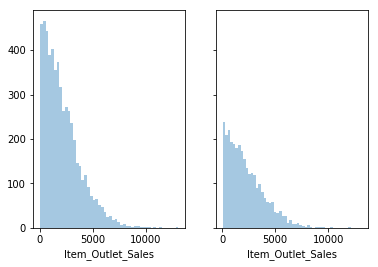

<Figure size 432x288 with 0 Axes>

In [67]:
fig , axes = plt.subplots(ncols = 2 , nrows = 1 , sharex = True , sharey = True )
data1 = train[train['Item_Fat_Content'] == 'Low Fat']
data2 = train[train['Item_Fat_Content'] == 'Regular']
plt.figure()
sns.distplot(data1['Item_Outlet_Sales'] , kde = False , bins = 50, ax = axes[0])
sns.distplot(data2['Item_Outlet_Sales'] , kde = False , bins = 50, ax = axes[1])


In [68]:
train1 = train
test1  = test

In [69]:
df = pd.get_dummies(train1['Item_Fat_Content'] , drop_first = True)

In [70]:
train1 = train1.join(df)

In [71]:
train1.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years,Food_Type,Regular
0,FDA15,9.300,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,20,Food,0
1,DRC01,5.920,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,10,Drinks,1
2,FDN15,17.500,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,20,Food,0
3,FDX07,19.200,Regular,0.053931,182.0950,Medium,Tier 3,Grocery Store,732.3800,21,Food,1
4,NCD19,8.930,Low Fat,0.053931,53.8614,High,Tier 3,Supermarket Type1,994.7052,32,Others,0
5,FDP36,10.395,Regular,0.053931,51.4008,Medium,Tier 3,Supermarket Type2,556.6088,10,Food,1
6,FDO10,13.650,Regular,0.012741,57.6588,High,Tier 3,Supermarket Type1,343.5528,32,Food,1
7,FDP10,12.600,Low Fat,0.127470,107.7622,Medium,Tier 3,Supermarket Type3,4022.7636,34,Food,0
8,FDH17,16.200,Regular,0.016687,96.9726,Small,Tier 2,Supermarket Type1,1076.5986,17,Food,1
9,FDU28,19.200,Regular,0.094450,187.8214,Small,Tier 2,Supermarket Type1,4710.5350,12,Food,1


In [72]:
df = pd.get_dummies(test1['Item_Fat_Content'] , drop_first = True)

In [73]:
test1 = test1.join(df)

In [74]:
df = pd.get_dummies(train1['Outlet_Size'] , drop_first = True)

In [75]:
train1 = train1.join(df)

In [76]:
df = pd.get_dummies(test1['Outlet_Size'] , drop_first = True)

In [77]:
test1 = test1.join(df)

In [78]:
df = pd.get_dummies(train1['Outlet_Location_Type'] , drop_first = True)

In [79]:
train1 = train1.join(df)

In [80]:
df = pd.get_dummies(test1['Outlet_Location_Type'] , drop_first = True)

In [81]:
test1 = test1.join(df)

In [82]:
df = pd.get_dummies(train1['Outlet_Type'] , drop_first = True)

In [83]:
train1 = train1.join(df)

In [84]:
df = pd.get_dummies(test1['Outlet_Type'] , drop_first = True)

In [85]:
test1 = test1.join(df)

In [86]:
df = pd.get_dummies(train1['Food_Type'] , drop_first = True)

In [87]:
train1 = train1.join(df)

In [88]:
df = pd.get_dummies(test1['Food_Type'] , drop_first = True)

In [89]:
test1 = test1.join(df)

In [90]:
train1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years,...,Regular,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Food,Others
0,FDA15,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,20,...,0,1,0,0,0,1,0,0,1,0
1,DRC01,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,10,...,1,1,0,0,1,0,1,0,0,0
2,FDN15,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,20,...,0,1,0,0,0,1,0,0,1,0
3,FDX07,19.20,Regular,0.053931,182.0950,Medium,Tier 3,Grocery Store,732.3800,21,...,1,1,0,0,1,0,0,0,1,0
4,NCD19,8.93,Low Fat,0.053931,53.8614,High,Tier 3,Supermarket Type1,994.7052,32,...,0,0,0,0,1,1,0,0,0,1


In [91]:
test1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years,Food_Type,Regular,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Food,Others
0,FDW58,20.750,Low Fat,0.007565,107.8622,Medium,Tier 1,Supermarket Type1,20,Food,0,1,0,0,0,1,0,0,1,0
1,FDW14,8.300,Regular,0.038428,87.3198,Small,Tier 2,Supermarket Type1,12,Food,1,0,1,1,0,1,0,0,1,0
2,NCN55,14.600,Low Fat,0.099575,241.7538,Medium,Tier 3,Grocery Store,21,Others,0,1,0,0,1,0,0,0,0,1
3,FDQ58,7.315,Low Fat,0.015388,155.0340,Small,Tier 2,Supermarket Type1,12,Food,0,0,1,1,0,1,0,0,1,0
4,FDY38,12.500,Regular,0.118599,234.2300,Medium,Tier 3,Supermarket Type3,34,Food,1,1,0,0,1,0,0,1,1,0


In [92]:
train1.drop(columns = ['Item_Identifier' , 'Item_Fat_Content' , 'Outlet_Size' , 'Outlet_Location_Type' ,
                      'Outlet_Type' , 'Food_Type'] , inplace = True)

In [93]:
test1.drop(columns = ['Item_Identifier' , 'Item_Fat_Content' , 'Outlet_Size' , 'Outlet_Location_Type' ,
                      'Outlet_Type' , 'Food_Type'] , inplace = True)

In [94]:
train1.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years,Regular,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Food,Others
0,9.30,0.016047,249.8092,3735.1380,20,0,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,48.2692,443.4228,10,1,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,141.6180,2097.2700,20,0,1,0,0,0,1,0,0,1,0
3,19.20,0.053931,182.0950,732.3800,21,1,1,0,0,1,0,0,0,1,0
4,8.93,0.053931,53.8614,994.7052,32,0,0,0,0,1,1,0,0,0,1


In [95]:
test1.head()

,Item_Weight,Item_Visibility,Item_MRP,Years,Regular,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Food,Others
0,20.750,0.007565,107.8622,20,0,1,0,0,0,1,0,0,1,0
1,8.300,0.038428,87.3198,12,1,0,1,1,0,1,0,0,1,0
2,14.600,0.099575,241.7538,21,0,1,0,0,1,0,0,0,0,1
3,7.315,0.015388,155.0340,12,0,0,1,1,0,1,0,0,1,0
4,12.500,0.118599,234.2300,34,1,1,0,0,1,0,0,1,1,0


In [96]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years,Food_Type
0,FDA15,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,20,Food
1,DRC01,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,10,Drinks
2,FDN15,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,20,Food
3,FDX07,19.20,Regular,0.053931,182.0950,Medium,Tier 3,Grocery Store,732.3800,21,Food
4,NCD19,8.93,Low Fat,0.053931,53.8614,High,Tier 3,Supermarket Type1,994.7052,32,Others


In [97]:
mc = MultiComparison(train['Item_Outlet_Sales'] , train['Outlet_Size'])
result = mc.tukeyhsd()

In [98]:
print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower     upper   reject
--------------------------------------------------
 High  Medium  -5.6682  -153.5078  142.1713 False 
 High  Small  -231.9665 -376.3708  -87.5622  True 
Medium Small  -226.2983 -318.5745 -134.0221  True 
--------------------------------------------------


In [99]:
event = {'High' : 'Medium' , 'Medium' : 'Medium' , 'Small' : 'Small'}

In [100]:
train['Outlet_Sizes'] = train['Outlet_Size'].apply(set_value , args = (event , ))

In [101]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years,Food_Type,Outlet_Sizes
0,FDA15,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,20,Food,Medium
1,DRC01,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,10,Drinks,Medium
2,FDN15,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,20,Food,Medium
3,FDX07,19.20,Regular,0.053931,182.0950,Medium,Tier 3,Grocery Store,732.3800,21,Food,Medium
4,NCD19,8.93,Low Fat,0.053931,53.8614,High,Tier 3,Supermarket Type1,994.7052,32,Others,Medium


In [102]:
test['Outlet_Sizes'] = test['Outlet_Size'].apply(set_value , args = (event , ))

In [103]:
mc = MultiComparison(train['Item_Outlet_Sales'] , train['Outlet_Location_Type'])
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff   lower    upper   reject
------------------------------------------------
Tier 1 Tier 2 447.0814  336.2033 557.9595  True 
Tier 1 Tier 3 402.7185  296.2441 509.1928  True 
Tier 2 Tier 3 -44.3629 -146.3104 57.5846  False 
------------------------------------------------


In [104]:
event = {'Tier 1' : 'Tier 1' , 'Tier 2' : 'Tier 2' , 'Tier 3' : 'Tier 2'}

In [105]:
train['Outlet_Location_Types'] = train['Outlet_Location_Type'].apply(set_value , args = (event , ))

In [106]:
test['Outlet_Location_Types'] = test['Outlet_Location_Type'].apply(set_value , args = (event , ))

In [107]:
mc = MultiComparison(train['Item_Outlet_Sales'] , train['Food_Type'])
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
Drinks  Food  155.3765 -8.4034  319.1564 False 
Drinks Others 93.1142  -92.0174 278.2457 False 
 Food  Others -62.2623 -174.315 49.7904  False 
-----------------------------------------------


In [108]:
train2 = train
test2 = test

In [109]:
train2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years,Food_Type,Outlet_Sizes,Outlet_Location_Types
0,FDA15,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,20,Food,Medium,Tier 1
1,DRC01,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,10,Drinks,Medium,Tier 2
2,FDN15,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,20,Food,Medium,Tier 1
3,FDX07,19.20,Regular,0.053931,182.0950,Medium,Tier 3,Grocery Store,732.3800,21,Food,Medium,Tier 2
4,NCD19,8.93,Low Fat,0.053931,53.8614,High,Tier 3,Supermarket Type1,994.7052,32,Others,Medium,Tier 2


In [110]:
test2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years,Food_Type,Outlet_Sizes,Outlet_Location_Types
0,FDW58,20.750,Low Fat,0.007565,107.8622,Medium,Tier 1,Supermarket Type1,20,Food,Medium,Tier 1
1,FDW14,8.300,Regular,0.038428,87.3198,Small,Tier 2,Supermarket Type1,12,Food,Small,Tier 2
2,NCN55,14.600,Low Fat,0.099575,241.7538,Medium,Tier 3,Grocery Store,21,Others,Medium,Tier 2
3,FDQ58,7.315,Low Fat,0.015388,155.0340,Small,Tier 2,Supermarket Type1,12,Food,Small,Tier 2
4,FDY38,12.500,Regular,0.118599,234.2300,Medium,Tier 3,Supermarket Type3,34,Food,Medium,Tier 2


In [111]:
train2.drop(columns = ['Outlet_Size' , 'Outlet_Location_Type'] , inplace = True)

In [112]:
test2.drop(columns = ['Outlet_Size' , 'Outlet_Location_Type'] , inplace = True)

In [113]:
train2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Type,Item_Outlet_Sales,Years,Food_Type,Outlet_Sizes,Outlet_Location_Types
0,FDA15,9.30,Low Fat,0.016047,249.8092,Supermarket Type1,3735.1380,20,Food,Medium,Tier 1
1,DRC01,5.92,Regular,0.019278,48.2692,Supermarket Type2,443.4228,10,Drinks,Medium,Tier 2
2,FDN15,17.50,Low Fat,0.016760,141.6180,Supermarket Type1,2097.2700,20,Food,Medium,Tier 1
3,FDX07,19.20,Regular,0.053931,182.0950,Grocery Store,732.3800,21,Food,Medium,Tier 2
4,NCD19,8.93,Low Fat,0.053931,53.8614,Supermarket Type1,994.7052,32,Others,Medium,Tier 2


In [114]:
test2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Type,Years,Food_Type,Outlet_Sizes,Outlet_Location_Types
0,FDW58,20.750,Low Fat,0.007565,107.8622,Supermarket Type1,20,Food,Medium,Tier 1
1,FDW14,8.300,Regular,0.038428,87.3198,Supermarket Type1,12,Food,Small,Tier 2
2,NCN55,14.600,Low Fat,0.099575,241.7538,Grocery Store,21,Others,Medium,Tier 2
3,FDQ58,7.315,Low Fat,0.015388,155.0340,Supermarket Type1,12,Food,Small,Tier 2
4,FDY38,12.500,Regular,0.118599,234.2300,Supermarket Type3,34,Food,Medium,Tier 2


In [115]:
df = pd.get_dummies(train2['Item_Fat_Content'] , drop_first = True)

In [116]:
train2 = train2.join(df)

In [117]:
df = pd.get_dummies(test2['Item_Fat_Content'] , drop_first = True)

In [118]:
test2 = test2.join(df)

In [119]:
df = pd.get_dummies(train2['Outlet_Type'] , drop_first = True)

In [120]:
train2 = train2.join(df)

In [121]:
df = pd.get_dummies(test2['Outlet_Type'] , drop_first = True)

In [122]:
test2 = test2.join(df)

In [123]:
df = pd.get_dummies(train2['Food_Type'] , drop_first = True)

In [124]:
train2 = train2.join(df)

In [125]:
df = pd.get_dummies(test2['Food_Type'] , drop_first = True)

In [126]:
test2 = test2.join(df)

In [127]:
df = pd.get_dummies(train2['Outlet_Sizes'] , drop_first = True)

In [128]:
train2 = train2.join(df)

In [129]:
df = pd.get_dummies(test2['Outlet_Sizes'] , drop_first = True)

In [130]:
test2 = test2.join(df)

In [131]:
train2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Type,Item_Outlet_Sales,Years,Food_Type,Outlet_Sizes,Outlet_Location_Types,Regular,Supermarket Type1,Supermarket Type2,Supermarket Type3,Food,Others,Small
0,FDA15,9.30,Low Fat,0.016047,249.8092,Supermarket Type1,3735.1380,20,Food,Medium,Tier 1,0,1,0,0,1,0,0
1,DRC01,5.92,Regular,0.019278,48.2692,Supermarket Type2,443.4228,10,Drinks,Medium,Tier 2,1,0,1,0,0,0,0
2,FDN15,17.50,Low Fat,0.016760,141.6180,Supermarket Type1,2097.2700,20,Food,Medium,Tier 1,0,1,0,0,1,0,0
3,FDX07,19.20,Regular,0.053931,182.0950,Grocery Store,732.3800,21,Food,Medium,Tier 2,1,0,0,0,1,0,0
4,NCD19,8.93,Low Fat,0.053931,53.8614,Supermarket Type1,994.7052,32,Others,Medium,Tier 2,0,1,0,0,0,1,0


In [132]:
test2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Type,Years,Food_Type,Outlet_Sizes,Outlet_Location_Types,Regular,Supermarket Type1,Supermarket Type2,Supermarket Type3,Food,Others,Small
0,FDW58,20.750,Low Fat,0.007565,107.8622,Supermarket Type1,20,Food,Medium,Tier 1,0,1,0,0,1,0,0
1,FDW14,8.300,Regular,0.038428,87.3198,Supermarket Type1,12,Food,Small,Tier 2,1,1,0,0,1,0,1
2,NCN55,14.600,Low Fat,0.099575,241.7538,Grocery Store,21,Others,Medium,Tier 2,0,0,0,0,0,1,0
3,FDQ58,7.315,Low Fat,0.015388,155.0340,Supermarket Type1,12,Food,Small,Tier 2,0,1,0,0,1,0,1
4,FDY38,12.500,Regular,0.118599,234.2300,Supermarket Type3,34,Food,Medium,Tier 2,1,0,0,1,1,0,0


In [133]:
train2.drop(columns = ['Item_Fat_Content' , 'Outlet_Type' , 'Food_Type' , 'Outlet_Sizes' , 'Outlet_Location_Types' ] ,
            inplace = True)

In [134]:
test2.drop(columns = ['Item_Fat_Content' , 'Outlet_Type' , 'Food_Type' , 'Outlet_Sizes' , 'Outlet_Location_Types' ] ,
            inplace = True)

In [135]:
train2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years,Regular,Supermarket Type1,Supermarket Type2,Supermarket Type3,Food,Others,Small
0,FDA15,9.30,0.016047,249.8092,3735.1380,20,0,1,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,443.4228,10,1,0,1,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,2097.2700,20,0,1,0,0,1,0,0
3,FDX07,19.20,0.053931,182.0950,732.3800,21,1,0,0,0,1,0,0
4,NCD19,8.93,0.053931,53.8614,994.7052,32,0,1,0,0,0,1,0


In [136]:
test2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Years,Regular,Supermarket Type1,Supermarket Type2,Supermarket Type3,Food,Others,Small
0,FDW58,20.750,0.007565,107.8622,20,0,1,0,0,1,0,0
1,FDW14,8.300,0.038428,87.3198,12,1,1,0,0,1,0,1
2,NCN55,14.600,0.099575,241.7538,21,0,0,0,0,0,1,0
3,FDQ58,7.315,0.015388,155.0340,12,0,1,0,0,1,0,1
4,FDY38,12.500,0.118599,234.2300,34,1,0,0,1,1,0,0


In [137]:
train2.drop(columns = ['Item_Identifier'] , inplace = True)

In [138]:
test2.drop(columns = ['Item_Identifier'] , inplace = True)

# Model Making

In [139]:
y = train2['Item_Outlet_Sales']
X = train2.drop(columns = ['Item_Outlet_Sales'])

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()

In [141]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)
#lin_reg.fit(X_train , y_train)

score = cross_val_score(lin_reg , X, y  , scoring = 'neg_mean_squared_error' , cv = 4)

In [142]:
score = np.sqrt(score * (-1))

In [143]:
score

array([1149.93802037, 1117.44082326, 1106.91304049, 1151.2488729 ])

In [144]:
score = np.mean(score , axis = 0)

In [145]:
score

1131.3851892533717

In [146]:
lin_reg.fit(X,y)
preds = pd.Series(lin_reg.predict(test2))


In [147]:
score

1131.3851892533717

# Let us use Decision Tree Regressor

In [148]:
from sklearn.tree import DecisionTreeRegressor
dec = DecisionTreeRegressor()

grid search CV

In [149]:
from sklearn.model_selection import GridSearchCV
para = {'max_depth' : [2,3,4,5] , 
       'min_samples_leaf' : [100,150,200]}
grid = GridSearchCV(dec , param_grid = para)
grid.fit(X_train , y_train)
grid.best_params_

D:\Anaconda Python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 5, 'min_samples_leaf': 100}

In [150]:
dec = DecisionTreeRegressor(max_depth = 5 , min_samples_leaf = 100)

In [151]:
scores = cross_val_score(dec , X , y, scoring= 'neg_mean_squared_error' , cv = 5)

In [152]:
scores = np.sqrt(scores*(-1))

In [153]:
scores

array([1104.46325297, 1086.47565249, 1098.8444765 , 1073.85144045,
       1089.8980901 ])

In [154]:
score = np.mean(scores , axis = 0)
score

1090.7065824999295

In [155]:
dec.fit(X,y)
preds = pd.Series(dec.predict(test2))

# Let us use Boosting

In [156]:
from sklearn.ensemble import GradientBoostingRegressor
gradBoost = GradientBoostingRegressor()
# tune min_samples_leaf
# tune min_samples_split
#max_depth
# max_features

In [157]:
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 100}

In [158]:
values = []
for i in np.linspace(30 , 120, 12).astype(int):
    gradBoost = GradientBoostingRegressor(max_depth  =  4, min_samples_leaf = 0.01, min_samples_split = 0.1 , n_estimators = i)
    scores = cross_val_score(gradBoost , X , y, scoring= 'neg_mean_squared_error' , cv = 5)
    scores = np.sqrt(scores*(-1))
    val = np.mean(scores , axis = 0)
    values.append(val)

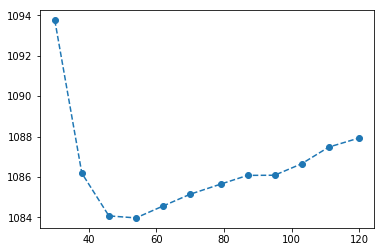

In [159]:
plt.figure()
plt.plot( np.linspace(30, 120 , 12).astype(int) ,values ,  marker = 'o' , linestyle = '--' )
#plt.x_label = 'Score'

In [160]:
 gradBoost = GradientBoostingRegressor(max_depth  =  4, min_samples_leaf = 0.01, min_samples_split = 0.1 , n_estimators = 55)

In [161]:
gradBoost.fit(X, y)
preds = pd.Series(gradBoost.predict(test2))

In [162]:
score

1090.7065824999295

# Let us use Random Forest Regressor

In [163]:
from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor()

In [164]:
para = {'min_samples_leaf' : np.logspace(-4 , -1 , 4),
       'max_depth' : np.linspace(2 , 5 , 4)}
grid = GridSearchCV(rand , param_grid = para , cv = 4)
grid.fit(X_train , y_train)

D:\Anaconda Python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda Python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda Python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda Python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda Python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default valu

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': array([0.0001, 0.001 , 0.01  , 0.1   ]), 'max_depth': array([2., 3., 4., 5.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [165]:
grid.best_params_

{'max_depth': 5.0, 'min_samples_leaf': 0.01}

In [166]:
rand = RandomForestRegressor(max_depth = 5 , min_samples_leaf = 0.01 , n_estimators = 80)
score = cross_val_score(rand , X , y , scoring = 'neg_mean_squared_error' , cv = 4)
score = np.sqrt(np.mean(score*(-1)))
score

1082.0904242677134

In [167]:
scores = []
for i in np.linspace(30 , 150 , 13).astype(int):
    rand = RandomForestRegressor(max_depth = 5 , min_samples_leaf = 0.01 , n_estimators = i)
    score = cross_val_score(rand , X , y , scoring = 'neg_mean_squared_error' , cv = 4)
    score = np.sqrt(np.mean(score*(-1)))
    scores.append(score)

In [168]:
np.linspace(30 , 150 , 13).astype(int)

array([ 30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150])

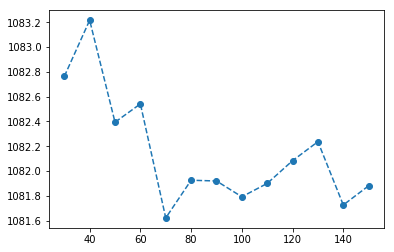

In [169]:
plt.figure()
plt.plot(np.linspace(30 , 150 , 13).astype(int) , scores , linestyle = '--' , marker = 'o')

In [170]:
scores = []
for i in np.linspace(30 , 150 , 13).astype(int):
    rand = RandomForestRegressor(max_depth = 5 , min_samples_leaf = 0.01 , n_estimators = i)
    score = cross_val_score(rand , X , y , scoring = 'neg_mean_squared_error' , cv = 4)
    score = np.sqrt(np.mean(score*(-1)))
    scores.append(score)

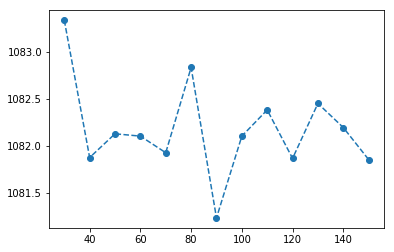

In [171]:
plt.figure()
plt.plot(np.linspace(30 , 150 , 13).astype(int) , scores , linestyle = '--' , marker = 'o')

In [172]:
rand1 = rand = RandomForestRegressor(max_depth = 5 , min_samples_leaf = 0.01 , n_estimators = 50)
scores = cross_val_score(rand1 , X , y , scoring = 'neg_mean_squared_error' , cv = 4)
scores = np.mean(np.sqrt(scores *(-1)) , axis = 0 )
scores

1082.4072094459239

In [173]:
rand = RandomForestRegressor(max_depth = 5 , min_samples_leaf = 0.01 , n_estimators = 50)
rand.fit(X, y)
preds = pd.Series(rand.predict(test2))
rand.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 0.01,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [174]:
submission = pd.DataFrame({'Item_Identifier' : sample['Item_Identifier'] , 
                         'Outlet_Identifier' : sample['Outlet_Identifier'] , 
                         'Item_Outlet_Sales' : preds})
filename = ('Big Mart Sales ii.csv')
submission.to_csv(filename , index = False)

In [ ]:
submission = pd.DataFrame({'Item_Identifier' : sample['Item_Identifier'] , 
                         'Outlet_Identifier' : sample['Outlet_Identifier'] , 
                         'Item_Outlet_Sales' : preds})
filename = ('Big Mart Sales iii.csv')
submission.to_csv(filename , index = False)

# Back to Feature Generation

In [179]:
train2.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years,Regular,Supermarket Type1,Supermarket Type2,Supermarket Type3,Food,Others,Small
0,9.30,0.016047,249.8092,3735.1380,20,0,1,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,10,1,0,1,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,20,0,1,0,0,1,0,0
3,19.20,0.053931,182.0950,732.3800,21,1,0,0,0,1,0,0
4,8.93,0.053931,53.8614,994.7052,32,0,1,0,0,0,1,0
